In [125]:
# Imports
import numpy as np
import tensorflow as tf
from skimage import data as skimageData
import numpy as np
import matplotlib.image as mpimg
import os




In [80]:
# Create a function to load the data

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if (f.endswith(".png") or f.endswith(".jpg"))]
        for f in file_names:
            #images.append(skimageData.imread(f))  ##leaving this option for modifications later!
            images.append(im.open(f, 'r').convert("RGB"))
            labels.append(d)
    return images, labels
tf.logging.set_verbosity(tf.logging.INFO)

In [159]:
ROOT_PATH = "/Users/nimishasharath/Documents/UW/AI/image-processing-shenanigans/Pokemon/data"
train_data_directory = os.path.join(ROOT_PATH, "Train")

# load the data into training and testing directories
trainImages, trainLabels = load_data(train_data_directory)


In [160]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import np_utils


#transforming the labels to numerical values
le = preprocessing.LabelEncoder()
transform = le.fit_transform(trainLabels)
trainLabels = np_utils.to_categorical(transform)


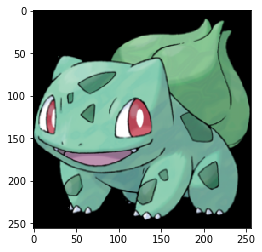

((431, 128, 128, 3), (431, 6), (144, 128, 128, 3), (144, 6))


In [161]:

import matplotlib.pyplot as plt 
from skimage import transform 

# Rescale the images in the `images` array to 128X128 
trainImages128 = np.array([transform.resize(np.array(image), (128, 128)) for image in trainImages])
x_train, x_test, y_train, y_test = train_test_split( trainImages128, trainLabels, test_size=0.25, random_state=42)

# Lets explore the data we have ! 
plt.imshow(trainImages256[56])
plt.imshow(testImages256[0])
plt.show()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


### Keras CNN Classifier


In [162]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

In [163]:
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, (5, 5), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, (5, 5), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, (5, 5), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, (5, 5), activation='relu', padding="same"))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(6, activation='softmax'))

adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=20)



Epoch 1/20
431/431 [==============================] - 14s 32ms/step - loss: 1.8172 - acc: 0.1763
Epoch 2/20
431/431 [==============================] - 13s 30ms/step - loss: 1.6368 - acc: 0.2599
Epoch 3/20
431/431 [==============================] - 13s 30ms/step - loss: 1.4180 - acc: 0.3828
Epoch 4/20
431/431 [==============================] - 13s 31ms/step - loss: 1.3132 - acc: 0.4710
Epoch 5/20
431/431 [==============================] - 13s 31ms/step - loss: 1.1715 - acc: 0.5615
Epoch 6/20
431/431 [==============================] - 13s 30ms/step - loss: 1.0018 - acc: 0.6079
Epoch 7/20
431/431 [==============================] - 13s 30ms/step - loss: 0.9613 - acc: 0.6334
Epoch 8/20
431/431 [==============================] - 13s 30ms/step - loss: 0.8412 - acc: 0.6729
Epoch 9/20
431/431 [==============================] - 13s 31ms/step - loss: 0.7587 - acc: 0.6937
Epoch 10/20
431/431 [==============================] - 13s 31ms/step - loss: 0.6118 - acc: 0.7587
Epoch 11/20
431/431 [========

In [167]:
model.evaluate(x_test, y_test, batch_size=16)


144/144 [==============================] - 3s 18ms/step


[2.825606796476576, 0.5694444444444444]

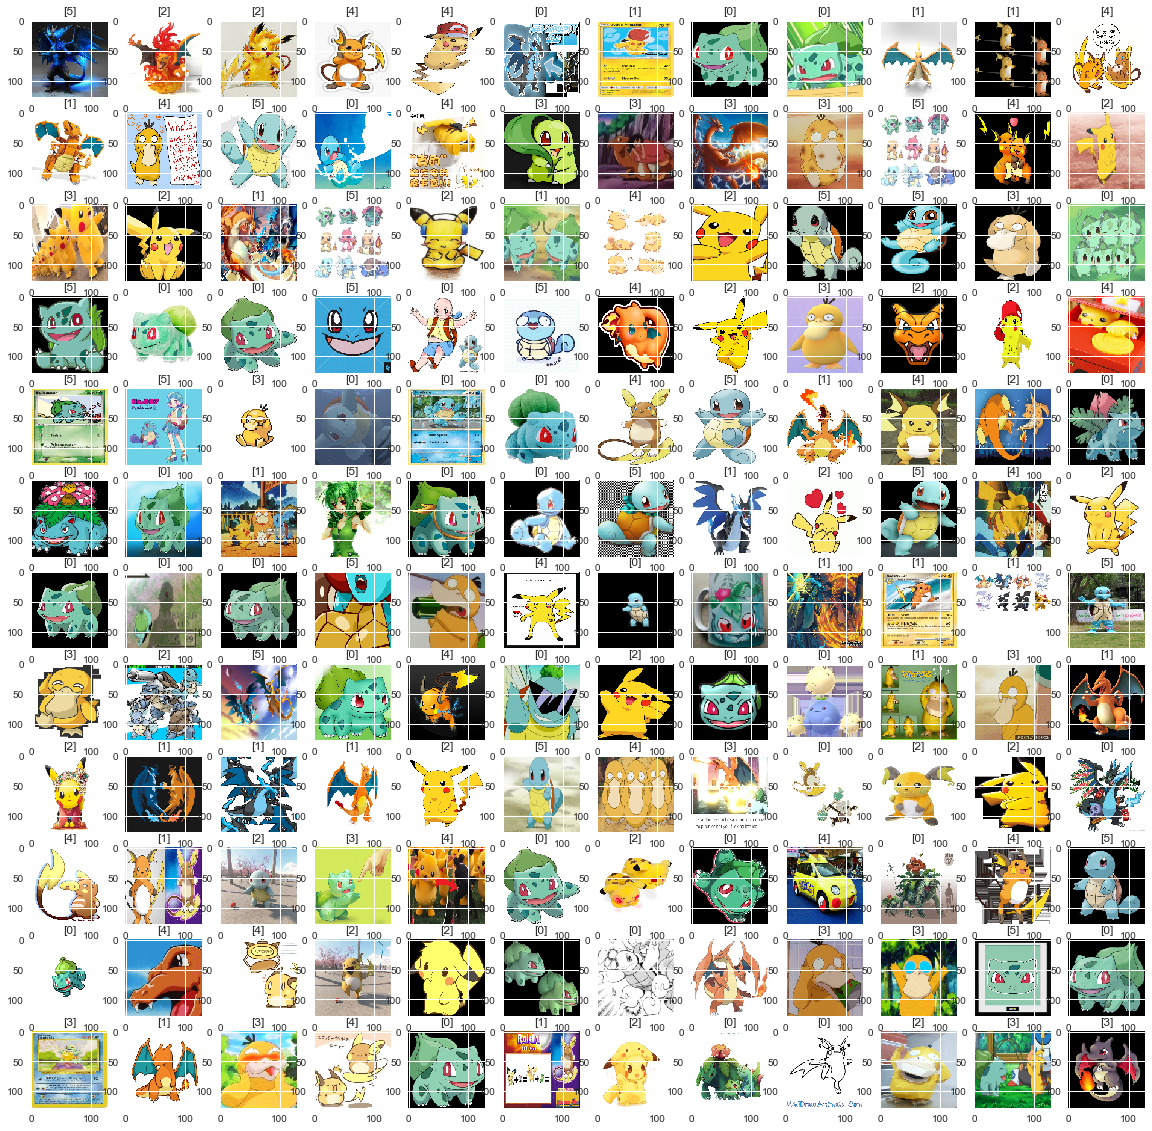

In [175]:
%matplotlib inline
predicted = []
plt.figure(figsize=(20,20))
for i in range(1,145):
    plt.subplot(12, 12, i)
    plt.imshow(x_test[i-1])
    p = model.predict_classes(x_test[i-1].reshape(1,128,128,3))
    predicted.append(p)
    plt.title(p)


In [176]:
import pandas as pd
import seaborn as sn

expected=[]
for label in y_test:
    for i in range(len(y_test[0])):
        if(label[i]==1):
            expected.append(i)


144

/Users/nimishasharath/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/nimishasharath/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/nimishasharath/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Bulbasaur', 'Charizard', 'Pikachu', 'Psyduck', 'Raichu',
       'Squirtle'], dtype='|S9')

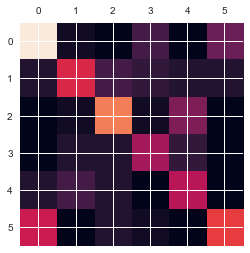

In [179]:

expected_inv = le.inverse_transform(expected)
predicted_inv = le.inverse_transform(predicted)
#df = pd.DataFrame(C, index=expected_inv, columns=predicted_inv)
#sn.set(font_scale=1) #for label size
#sn.heatmap(df, annot=True,annot_kws={"size": 16}) # font size
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(expected_inv, predicted_inv))
le.inverse_transform(range(6))